Version con Selenium + BeatifulSoup

In [2]:
# !pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd

In [8]:


# Configurazione del driver per Selenium
driver = webdriver.Chrome()

# Imposta un tempo massimo di attesa per i singoli elementi
wait = WebDriverWait(driver, 10)

# Accedi alla pagina web
driver.get("https://www.scrapethissite.com/pages/ajax-javascript/")

# Elenco degli anni da selezionare
years = ["2015", "2014", "2013", "2012", "2011", "2010"]

# Lista per raccogliere tutti i dati dei film
all_films_data = []

for year in years:
    # Clicca sul link dell'anno usando il suo ID
    wait.until(EC.element_to_be_clickable((By.ID, year))).click()
    
    # Aspetta che la tabella con i dati sia visibile dopo il clic
    wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, ".table")))
    
    # Recupera il codice HTML aggiornato della pagina
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # Utilizza BeautifulSoup per analizzare i dati
    table_body = soup.find('tbody', {'id': 'table-body'})
    films = table_body.find_all('tr', {'class': 'film'}) if table_body else []
    for film in films:
        title = film.find('td', {'class': 'film-title'}).text.strip()
        nominations = film.find('td', {'class': 'film-nominations'}).text.strip()
        awards = film.find('td', {'class': 'film-awards'}).text.strip()
        best_picture = film.find('td', {'class': 'film-best-picture'}).text.strip()
        
        film_details = {
            "year": year,
            "title": title,
            "nominations": int(nominations),
            "awards": int(awards),
            "best_picture": bool(best_picture)
        }
        all_films_data.append(film_details)

# Chiudi il driver
driver.quit()

# Crea un DataFrame pandas dai dati raccolti
df = pd.DataFrame(all_films_data)

# Stampa il DataFrame per visualizzare i dati
print(df)

# Funzione per salvare i dati in un file CSV
def save_to_csv(dataframe, file_name):
    dataframe.to_csv(file_name, index=False)
    print(f"Data saved to {file_name}")

# Chiama la funzione per salvare i dati in CSV
save_to_csv(df, "film_data.csv")

df

    year               title  nominations  awards  best_picture
0   2015           Spotlight            6       2         False
1   2015  Mad Max: Fury Road           10       6         False
2   2015        The Revenant           12       3         False
3   2015     Bridge of Spies            6       1         False
4   2015       The Big Short            5       1         False
..   ...                 ...          ...     ...           ...
82  2010      The Lost Thing            1       1         False
83  2010         God of Love            1       1         False
84  2010         The Wolfman            1       1         False
85  2010   Strangers No More            1       1         False
86  2010          Inside Job            1       1         False

[87 rows x 5 columns]
Data saved to film_data.csv


,year,title,nominations,awards,best_picture
0,2015,Spotlight,6,2,False
1,2015,Mad Max: Fury Road,10,6,False
2,2015,The Revenant,12,3,False
3,2015,Bridge of Spies,6,1,False
4,2015,The Big Short,5,1,False
...,...,...,...,...,...
82,2010,The Lost Thing,1,1,False
83,2010,God of Love,1,1,False
84,2010,The Wolfman,1,1,False
85,2010,Strangers No More,1,1,False


ora facciamo un po' di analisi sui dati

    year                     title  nominations  awards  best_picture
2   2015              The Revenant           12       3         False
47  2012                   Lincoln           12       2         False
74  2010         The King's Speech           12       4         False
60  2011                      Hugo           11       5         False
45  2012                Life of Pi           11       4         False
1   2015        Mad Max: Fury Road           10       6         False
33  2013                   Gravity           10       7         False
59  2011                The Artist           10       5         False
17  2014  The Grand Budapest Hotel            9       4         False
16  2014                   Birdman            9       4         False


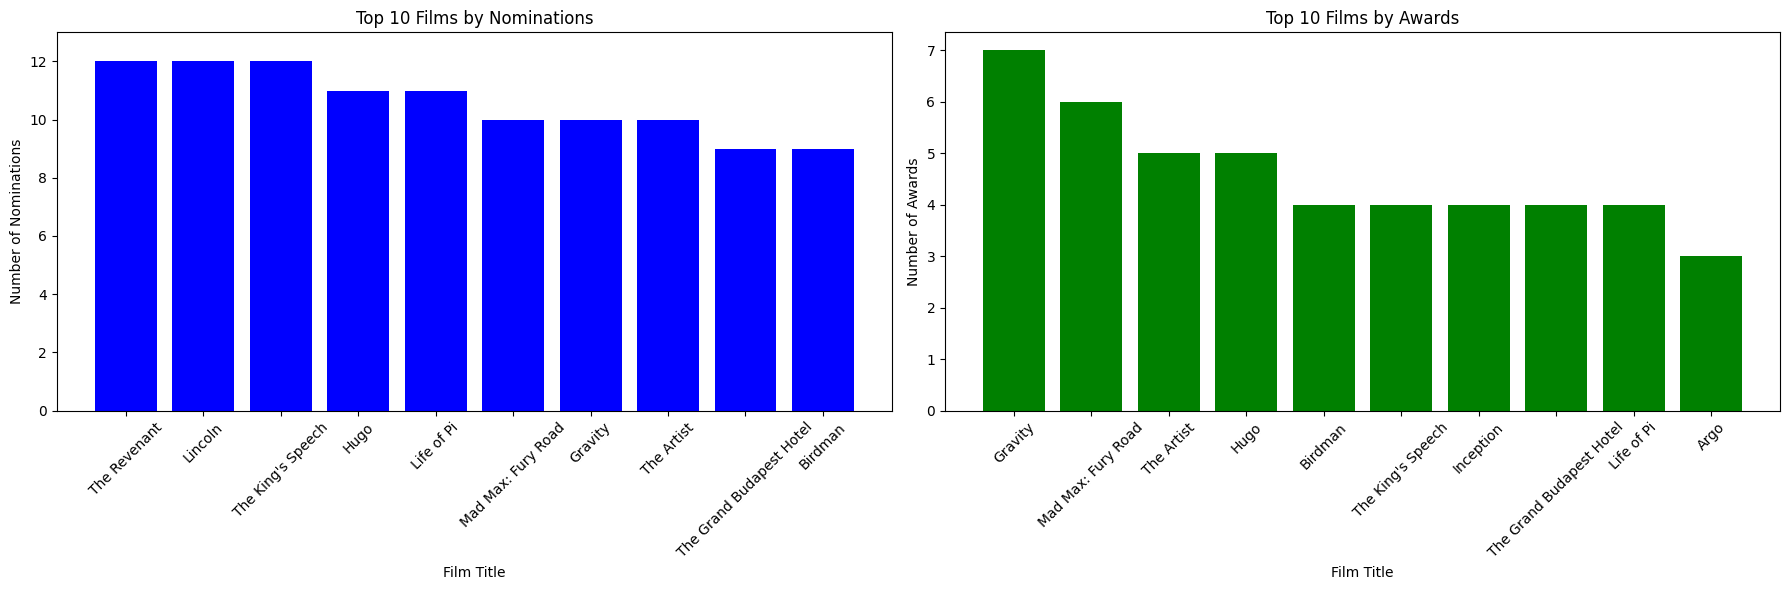

In [9]:
# creaiamo un istogramma per visualizzare i film con più nomination e premi, una barra per ogni anno e coloriamo le barre in base al anno
import pandas as pd
import matplotlib.pyplot as plt


# Ordinamento dei dati per numero di nomination e selezione dei primi 10 film
top_nominations = df.sort_values(by='nominations', ascending=False).head(10)
print(top_nominations)

# Ordinamento dei dati per numero di premi e selezione dei primi 10 film
top_awards = df.sort_values(by='awards', ascending=False).head(10)

# Creazione di due grafici
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Grafico per le nomination
axes[0].bar(top_nominations['title'], top_nominations['nominations'], color='blue')
axes[0].set_title('Top 10 Films by Nominations')
axes[0].set_xlabel('Film Title')
axes[0].set_ylabel('Number of Nominations')
axes[0].tick_params('x', rotation=45)
axes[0].set_ylim(0, top_nominations['nominations'].max() + 1)  # Imposta il limite inferiore a 0 e aggiunge un buffer al massimo


# Grafico per i premi
axes[1].bar(top_awards['title'], top_awards['awards'], color='green')
axes[1].set_title('Top 10 Films by Awards')
axes[1].set_xlabel('Film Title')
axes[1].set_ylabel('Number of Awards')
axes[1].tick_params('x', rotation=45)
axes[0].set_ylim(0, top_nominations['nominations'].max() + 1)  # Imposta il limite inferiore a 0 e aggiunge un buffer al massimo


plt.tight_layout()
plt.show()


